<a href="https://colab.research.google.com/github/Nichika0617/BasicSeminar/blob/main/BasicSeminar18_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rasbt/python-machine-learning-book-3rd-edition.git

fatal: destination path 'python-machine-learning-book-3rd-edition' already exists and is not an empty directory.


### 18.4.1 OpenAI Gymツールキット

OpenAI Gymの既存の環境を操作する．

Gym環境の練習として，あらかじめ定義されているCartPole-v1の環境を作成する．

このサンプル環境では横方向に移動できるカートに棒が取り付けられている．

![CartPole](https://drive.google.com/uc?export=view&id=1qQfuqi3WfI8fvFh0vpZdKMRkio3KGvYZ)

棒の動きは物理学の法則によって制御される．棒を安定させ，どちらかの側に倒れないようにする方法を学習することが強化学習エージェントの目標となる．

まず，状態(観測)空間，行動空間，行動を実行する方法など，強化学習の観点から見たCartPole環境の特性を調べる．

In [ ]:
import gym
env = gym.make('CartPole-v1')
env.observation_space
env.action_space

Discrete(2)

CartPole問題の環境を作成した．

この環境の観測空間はBox(4,)で，4つの実数値(カートの位置，カートの速度，棒の角度，棒が倒れる速さ)に対応する4次元空間を表している．

行動空間は離散空間Discrete(2)で，カートを左に押すか，右に押すかの2つの選択肢がある．

gym.make('cartPole-v1')の呼び出しによって作成された環境オブジェクトenvには，resetメソッドがある．

このメソッドを呼び出すと，各エピソードの前に環境を初期化できる．

基本的には棒が開始状態$(S_{0})$に設定される．

In [ ]:
env.reset()

array([ 0.04166757, -0.00772969,  0.0451547 ,  0.04834232])

resetメソッドの呼び出しによって返された配列の値は，カートの初期位置，速度，棒の角度(ラジアン)，角速度を示している．

resetメソッドを呼び出すと，このように4つの値が$[-0.05, 0.05]$の範囲の一様分布の乱数で初期化される．

環境をリセットした後は，環境を操作できる．

環境を操作するには行動(action)を選択し，その行動をstepメソッドに渡す．

In [ ]:
env.step(action=0)

(array([ 0.04151298, -0.20346906,  0.04612155,  0.35492307]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.0374436 , -0.0090322 ,  0.05322001,  0.07713285]), 1.0, False, {})

2つのコマンドenv.step(action=0)とenv.step(action=1)を使って，カートを左に押した後(action=0)，右に押している(action=1)．

選択された行動に基づき，カートと棒が物理学の法則に従って行動するenv.stepメソッドを呼び出すたびに次の4つの要素からなるタプルが返される．

* 新しい状態(観測値)を表す配列
* 報酬(float型のスカラー値)
* 終了フラグ(TrueまたはFalse)
* 補足情報を含んだPythonディクショナリ

envオブジェクトには，各時刻(または一連の時刻)の後に実行できるrenderメソッドもある．このメソッドを実行すると，環境及びカートと棒の動きを時間の流れに沿って可視化できる．

エピソードが終了するのは，棒の角度が想像上の縦軸から(いずれかの軸に)12度以上開いた時か，カートの位置が中央の位置から2.4ユニット以上離れた時である．

この例では，カートと棒が安定している時間を有効な範囲内で最大化することが報酬として定義される．

つまり，総報酬(利得)を最大にするにはエピソードの長さを最大にすればよい．

In [ ]:
# カートを右に押し続ける
env.step(action=1)

(array([ 0.03726295,  0.18528801,  0.05476267, -0.19829548]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.04096872,  0.37958567,  0.05079676, -0.47321287]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.04856043,  0.5739548 ,  0.0413325 , -0.74946267]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.06003952,  0.76848299,  0.02634325, -1.02885747]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.07540918,  0.96324463,  0.0057661 , -1.31315455]), 1.0, False, {})

In [ ]:
env.step(action=1)
# You are calling 'step()' even though this environment has already returned done = True.

(array([ 0.09467408,  1.15829312, -0.02049699, -1.60402719]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.11783994,  1.35365149, -0.05257754, -1.90302889]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.14491297,  1.54930088, -0.09063812, -2.21154809]), 1.0, False, {})

In [ ]:
env.step(action=1)

(array([ 0.17589899,  1.74516628, -0.13486908, -2.53075135]), 1.0, False, {})

___
### グリッドワールド問題

グリッドワールド問題に取り組む．

グリッドワールドはm行n列の単純な環境であり，次のようにまとめることができる．

![Grid](https://drive.google.com/uc?export=view&id=17zTspyiVdpcJakua57F337ukA5kxxKPq)



この環境には30種類の状態がある．

そのうちの4つは終了状態であり，状態16にゴールドのポットがあり，

状態10,15,22にトラップがある．

これら4つの終了状態のいずれかに遷移するとエピソードが終了するが，ゴールド状態とトラップ状態の間には違いがある．

ゴールド状態に遷移すると正の報酬(+1)が与えられ，トラップ状態に遷移すると負の報酬(-1)が与えらえる．他の状態は全て報酬なし(0)．

エージェントの最初の状態は常に0であり，環境をリセットするたびにエージェントは状態0に戻る．

行動空間は上，下，左，右の4つの方向で構成される．

エージェントがグリッドの外側との境界に位置していて，グリッドの外に出る行動を選択した場合，状態は変化しない．

次にOpenAI Gymを使って，この環境をPythonで実装する方法を見ていく．

### グリッドワールド環境をOpenAI Gymで実装する．

OpenAI Gymは可視化を目的とした環境のレンダリングにPygletライブラリを使っており，便利なラッパークラスとラッパー関数を提供している．

次のコードではこれらのラッパークラスを使ってグリッドワールド環境を可視化する．

### インストール関係

In [ ]:
!apt-get install python-opengl -y
!pip install pyvirtualdisplay 



import gym
import os
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install -y xvfb x11-utils # X11 システムの依存関係をインストール
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.* # 追加の Python 依存関係をインストール
!pip install gym[box2d]==0.17.*  # OpenAI Gym パッケージをインストールする

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!echo $DISPLAY # バックグラウンドで仮想ディスプレイを作成する

In [ ]:
import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [ ]:
!echo $DISPLAY

:1005


In [ ]:
!pip show pyglet

Name: pyglet
Version: 1.5.0
Summary: Cross-platform windowing and multimedia library
Home-page: http://pyglet.readthedocs.org/en/latest/
Author: Alex Holkner
Author-email: Alex.Holkner@gmail.com
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: future
Required-by: gym


In [ ]:
# !pip install 'gym[all]'
!pip install gym_ple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 参考

* [How to render OpenAI gym in google Colab? [closed]](https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab)

* [Rendering OpenAI Gym Envs on Binder and Google Colab](https://davidrpugh.github.io/stochastic-expatriate-descent/openai/binder/google-colab/2020/04/16/remote-rendering-gym-envs.html)

* [NameError: name 'base' is not defined #1898](https://github.com/openai/gym/issues/1898)

* [ImportError: cannot import 'rendering' from 'gym.envs.classic_control'](https://stackoverflow.com/questions/71973392/importerror-cannot-import-rendering-from-gym-envs-classic-control)

* [Openai headless. #883](https://github.com/openai/gym/issues/883)

### ヘルパー関数の定義

In [ ]:
# coding: utf-8

# Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

import numpy as np
from gym.envs.toy_text import discrete
from collections import defaultdict
import time
import pickle
import os

from gym.envs.classic_control import rendering

CELL_SIZE = 100
MARGIN = 10


def get_coords(row, col, loc='center'):
    xc = (col + 1.5) * CELL_SIZE
    yc = (row + 1.5) * CELL_SIZE
    if loc == 'center':
        return xc, yc
    elif loc == 'interior_corners':
        half_size = CELL_SIZE//2 - MARGIN
        xl, xr = xc - half_size, xc + half_size
        yt, yb = xc - half_size, xc + half_size
        return [(xl, yt), (xr, yt), (xr, yb), (xl, yb)]
    elif loc == 'interior_triangle':
        x1, y1 = xc, yc + CELL_SIZE//3
        x2, y2 = xc + CELL_SIZE//3, yc - CELL_SIZE//3
        x3, y3 = xc - CELL_SIZE//3, yc - CELL_SIZE//3
        return [(x1, y1), (x2, y2), (x3, y3)]


def draw_object(coords_list):
    if len(coords_list) == 1:  # -> 円
        obj = rendering.make_circle(int(0.45*CELL_SIZE))
        obj_transform = rendering.Transform()
        obj.add_attr(obj_transform)
        obj_transform.set_translation(*coords_list[0])
        obj.set_color(0.2, 0.2, 0.2)  # -> 黒
    elif len(coords_list) == 3:  # -> 三角形
        obj = rendering.FilledPolygon(coords_list)
        obj.set_color(0.9, 0.6, 0.2)  # -> 黄
    elif len(coords_list) > 3:  # -> ポリゴン
        obj = rendering.FilledPolygon(coords_list)
        obj.set_color(0.4, 0.4, 0.8)  # -> 青
    return obj



一つ目のヘルパー関数`get_coords`は，ゴールドを表示する三角形やトラップを表示する円など，グリッドワールド関数のアノテーション(注記)として用いる図形の座標を返す．(coords : 座標)

これらの座標のリストは2つ目のヘルパー関数`draw_object`に渡される．

この関数は，入力として渡された座標のリストの長さに基づいて描画する図形(円，三角形，またはポリゴン)を決める．

次にグリッドワールド環境を定義するために，`GridWorldEnv`というクラスを定義する．


このクラスは`OpenAI Gym`の`DiscreteEnv`クラスを継承する．

このクラスの最も重要なメソッドはコンストラクタ`__init__`である．

ここで行動空間を定義し，各行動の役割を指定して，終了状態(ゴールドとトラップ)を決める．

In [ ]:

class GridWorldEnv(discrete.DiscreteEnv):
    def __init__(self, num_rows=4, num_cols=6, delay=0.05):
        self.num_rows = num_rows
        self.num_cols = num_cols

        self.delay = delay

        move_up = lambda row, col: (max(row - 1, 0), col)
        move_down = lambda row, col: (min(row + 1, num_rows - 1), col)
        move_left = lambda row, col: (row, max(col - 1, 0))
        move_right = lambda row, col: (row, min(col + 1, num_cols - 1))

        self.action_defs = {0: move_up, 1: move_right,
                            2: move_down, 3: move_left}

        # 状態と行動の数
        nS = num_cols * num_rows
        nA = len(self.action_defs)
        self.grid2state_dict = {(s // num_cols, s % num_cols): s
                                for s in range(nS)}
        self.state2grid_dict = {s: (s // num_cols, s % num_cols)
                                for s in range(nS)}

        # ゴールド状態
        gold_cell = (num_rows // 2, num_cols - 2)

        # トラップ状態
        trap_cells = [((gold_cell[0] + 1), gold_cell[1]),
                      (gold_cell[0], gold_cell[1] - 1),
                      ((gold_cell[0] - 1), gold_cell[1])]

        gold_state = self.grid2state_dict[gold_cell]
        trap_states = [self.grid2state_dict[(r, c)]
                       for (r, c) in trap_cells]
        self.terminal_states = [gold_state] + trap_states
        print(self.terminal_states)

        # 遷移確立を構築
        P = defaultdict(dict)
        for s in range(nS):
            row, col = self.state2grid_dict[s]
            P[s] = defaultdict(list)
            for a in range(nA):
                action = self.action_defs[a]
                next_s = self.grid2state_dict[action(row, col)]

                # 終了状態
                if self.is_terminal(next_s):
                    r = (1.0 if next_s == self.terminal_states[0]
                         else -1.0)
                else:
                    r = 0.0
                if self.is_terminal(s):
                    done = True
                    next_s = s
                else:
                    done = False
                P[s][a] = [(1.0, next_s, r, done)]

        # 初期状態分布
        isd = np.zeros(nS)
        isd[0] = 1.0

        super(GridWorldEnv, self).__init__(nS, nA, P, isd)

        self.viewer = None
        self._build_display(gold_cell, trap_cells)

    def is_terminal(self, state):
        return state in self.terminal_states

    def _build_display(self, gold_cell, trap_cells):

        screen_width = (self.num_cols + 2) * CELL_SIZE
        screen_height = (self.num_rows + 2) * CELL_SIZE
        self.viewer = rendering.Viewer(screen_width,
                                       screen_height)

        all_objects = []

        # 境界線の座標のリスト
        bp_list = [
            (CELL_SIZE - MARGIN, CELL_SIZE - MARGIN),
            (screen_width - CELL_SIZE + MARGIN, CELL_SIZE - MARGIN),
            (screen_width - CELL_SIZE + MARGIN,
             screen_height - CELL_SIZE + MARGIN),
            (CELL_SIZE - MARGIN, screen_height - CELL_SIZE + MARGIN)
        ]
        border = rendering.PolyLine(bp_list, True)
        border.set_linewidth(5)
        all_objects.append(border)

        # 縦線
        for col in range(self.num_cols + 1):
            x1, y1 = (col + 1) * CELL_SIZE, CELL_SIZE
            x2, y2 = (col + 1) * CELL_SIZE, \
                     (self.num_rows + 1) * CELL_SIZE
            line = rendering.PolyLine([(x1, y1), (x2, y2)], False)
            all_objects.append(line)

        # 横線
        for row in range(self.num_rows + 1):
            x1, y1 = CELL_SIZE, (row + 1) * CELL_SIZE
            x2, y2 = (self.num_cols + 1) * CELL_SIZE, \
                     (row + 1) * CELL_SIZE
            line = rendering.PolyLine([(x1, y1), (x2, y2)], False)
            all_objects.append(line)

        # トラップ: --> 円
        for cell in trap_cells:
            trap_coords = get_coords(*cell, loc='center')
            all_objects.append(draw_object([trap_coords]))

        # ゴールド:  --> 三角形
        gold_coords = get_coords(*gold_cell,
                                 loc='interior_triangle')
        all_objects.append(draw_object(gold_coords))

        # エージェント --> 四角形またはロボット
        if (os.path.exists('robot-coordinates.pkl') and CELL_SIZE == 100):
            agent_coords = pickle.load(
                open('robot-coordinates.pkl', 'rb'))
            starting_coords = get_coords(0, 0, loc='center')
            agent_coords += np.array(starting_coords)
        else:
            agent_coords = get_coords(0, 0, loc='interior_corners')
        agent = draw_object(agent_coords)
        self.agent_trans = rendering.Transform()
        agent.add_attr(self.agent_trans)
        all_objects.append(agent)

        for obj in all_objects:
            self.viewer.add_geom(obj)

    def render(self, mode='human', done=False):
        if done:
            sleep_time = 1
        else:
            sleep_time = self.delay
        x_coord = self.s % self.num_cols
        y_coord = self.s // self.num_cols
        x_coord = (x_coord + 0) * CELL_SIZE
        y_coord = (y_coord + 0) * CELL_SIZE
        self.agent_trans.set_translation(x_coord, y_coord)
        rend = self.viewer.render(
            return_rgb_array=(mode == 'rgb_array'))
        time.sleep(sleep_time)
        return rend

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None




このコードは，グリッドワールド環境を定義している．

この定義からグリッドワールド環境のインスタンスを作成し，CartPoleの例と同じように環境を操作できる．

このクラスGridWorldEnvは状態をリセットするためのresetや行動を実行するためのstepなどのメソッドを継承している．

この実装の詳細は以下である．

* ラムダ関数` move_up，move_down，move_left，move_right`を使って4種類の行動を定義している．

* Numpy配列isdに開始状態の確率を格納し，resetメソッドが呼び出された時に，この分布に基づいてランダム状態が選択されるようにしている．常に状態0(グリッドワールドの左下隅)から始まるため，状態0の確率を1.0に設定し．他の29の状態の確率を0.0に設定している．

* ある行動を選択した時にある状態から別の状態に遷移する確率はPythonディクショナリPで定義されている遷移確立によって決まる．これにより，確立的な環境が得られる．つまり，ある行動を選択した結果は環境の確率的な偶然性に基づいて異なる可能性がある．ここでは結果を一つだけにしている．(選択した行動の向きに状態を変化させる．)最後に，次の状態を決定するためにこれらの繊維確立をenv.stepメソッドで使う．

* さらに，`_build_display`メソッドで環境の最初の可視化を準備し，renderメソッドでエージェントの動きを表示する．

学習プロセスでは，遷移確率は不明であり，環境とのやり取りを通じて学習することが目標となる．このため，クラス定義の外でPにアクセスすることはできない．

この実装をテストするために，新しい環境を作成し，状態ごとに行動をランダムに選択することで，ランダムなエピソードを可視化する．

以下のコードでグリッドワールド環境が表示される．

In [ ]:
if __name__ == '__main__':
    env = GridWorldEnv(5, 6)
    d = Display()
    d.start()

    for i in range(1):
        s = env.reset()
        #env.render(mode='human', done=False)
        screen = env.render(mode='human',done=False)
        
        
    if d:
        env.reset()

        while True:
            action = np.random.choice(env.nA)
            res = env.step(action)
            print('Action ', env.s, action, ' -> ', res)
            #env.render(mode='human', done=res[2])
            if res[2]:
                break

    env.close()


[16, 22, 15, 10]
Action  1 1  ->  (1, 0.0, False, {'prob': 1.0})
Action  0 3  ->  (0, 0.0, False, {'prob': 1.0})
Action  0 0  ->  (0, 0.0, False, {'prob': 1.0})
Action  1 1  ->  (1, 0.0, False, {'prob': 1.0})
Action  7 2  ->  (7, 0.0, False, {'prob': 1.0})
Action  6 3  ->  (6, 0.0, False, {'prob': 1.0})
Action  6 3  ->  (6, 0.0, False, {'prob': 1.0})
Action  0 0  ->  (0, 0.0, False, {'prob': 1.0})
Action  1 1  ->  (1, 0.0, False, {'prob': 1.0})
Action  2 1  ->  (2, 0.0, False, {'prob': 1.0})
Action  8 2  ->  (8, 0.0, False, {'prob': 1.0})
Action  2 0  ->  (2, 0.0, False, {'prob': 1.0})
Action  2 0  ->  (2, 0.0, False, {'prob': 1.0})
Action  3 1  ->  (3, 0.0, False, {'prob': 1.0})
Action  4 1  ->  (4, 0.0, False, {'prob': 1.0})
Action  4 0  ->  (4, 0.0, False, {'prob': 1.0})
Action  5 1  ->  (5, 0.0, False, {'prob': 1.0})
Action  5 0  ->  (5, 0.0, False, {'prob': 1.0})
Action  4 3  ->  (4, 0.0, False, {'prob': 1.0})
Action  3 3  ->  (3, 0.0, False, {'prob': 1.0})
Action  2 3  ->  (2, 0.

画像の表示方法がいろいろ調べてもわからない．

Colabでのenv.renderの動かし方．代わり，探し中.


https://qiita.com/ymd_h/items/c393797deb72e1779269



とりあえずColabには手動で表示しておく．(2022/08/07)
![CartPole](https://drive.google.com/uc?export=view&id=1PsMhuVQLNkzH0fddSFc3EoHlaeYaPnv7)

### 18.4.2 グリッドワールド問題をQ学習で解く．

現在最も人気の高い強化学習アルゴリズムであるQ学習を実装する．

ここでは，既に実装したグリッドワールド環境を利用する．

In [ ]:
# coding: utf-8

# Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

from collections import defaultdict
import numpy as np


class Agent(object):
    def __init__(
            self, env,
            learning_rate=0.01,
            discount_factor=0.9,
            epsilon_greedy=0.9,
            epsilon_min=0.1,
            epsilon_decay=0.95):
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon_greedy
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        # Define the q_table
        self.q_table = defaultdict(lambda: np.zeros(self.env.nA))

    def choose_action(self, state):
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.env.nA)
        else:
            q_vals = self.q_table[state]
            perm_actions = np.random.permutation(self.env.nA)
            q_vals = [q_vals[a] for a in perm_actions]
            perm_q_argmax = np.argmax(q_vals)
            action = perm_actions[perm_q_argmax]
        return action

    def _learn(self, transition):
        s, a, r, next_s, done = transition
        q_val = self.q_table[s][a]
        if done:
            q_target = r
        else:
            q_target = r + self.gamma*np.max(self.q_table[next_s])

        # Update the q_table
        self.q_table[s][a] += self.lr * (q_target - q_val)

        # Adjust the epislon
        self._adjust_epsilon()

    def _adjust_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

コンストラクタ`__init__`では，学習率．割引率$(γ)$，$ϵ$-$greedy$ポリシーのパラメータなど，様々なハイパーパラメータを設定している．

最初は$ϵ$に大きな値を設定するが，`_adjust_epsilon`メソッドで最小値$ϵ_{min}$になるまで値を小さくしていく．

`choose_action`メソッドは$ϵ$-$greedy$ポリシーに基づいて行動を選択する．

行動をランダムに選択するのか，それとも行動価値関数に基づいて選択するのかを決めるために，一様分布の乱数を使っている．

`_learn`メソッドはQ学習アルゴリズムの更新ルールを実装する．

このメソッドは遷移ごとにタプル(trainsition)を受け取る．このタプルは現在の状態$(s)$，選択した行動$(a)$，観測した報酬$(r)$，次の状態$(s')$，そしてエピソードの終わりに到達したかどうかを判断するためのフラグで構成されている．

このフラグがTrueである(エピソードの終わりに到達している)場合，目的関数は観測した報酬と等しい．このフラグがFalseである場合，目的価値は$r+γmaxQ(s',a)$である．

最後に全てのコードを組み合わせ，**Q学習アルゴリズム**を使ってエージェントを訓練する．



まず，`run_qlearning`という関数を定義する．

この関数は，Q学習アルゴリズムを実装し，エージェントの `choose_action` メソッドを呼び出して環境を実行することで，
エピソードをシミュレートする．

続いて，transition タプルをエージェントの `_learn` メソッドに渡すことで，行動価値関数を更新する．

さらに，学習プロセスを監視するために，各エピソードの最終的な報酬(–1 または +1)と，エピソードの長さ(エピソードの開始から終了までのエージェントの遷移回数)も格納する．

続いて，`plot_learning_history` 関数を使って報酬のリストと遷移回数をプロットする。


参考
* [import agent error #81](https://github.com/carla-simulator/scenario_runner/issues/81)

* [How to fix "ModuleNotFoundError: No module named 'gridworld'"](https://copypaste.guru/WhereIsMyPythonModule/how-to-fix-modulenotfounderror-no-module-named-gridworld)

In [ ]:
!pip install agent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd python-machine-learning-book-3rd-edition/ch18/gridworld/

/content/python-machine-learning-book-3rd-edition/ch18/gridworld


In [ ]:
import time

[16, 22, 15, 10]
Episode 0: Reward -1.0 #Moves 10
Episode 1: Reward -1.0 #Moves 40
Episode 2: Reward -1.0 #Moves 28
Episode 3: Reward -1.0 #Moves 21
Episode 4: Reward -1.0 #Moves 20
Episode 5: Reward -1.0 #Moves 22
Episode 6: Reward -1.0 #Moves 39
Episode 7: Reward 1.0 #Moves 42
Episode 8: Reward -1.0 #Moves 145
Episode 9: Reward -1.0 #Moves 47
Episode 10: Reward -1.0 #Moves 9
Episode 11: Reward -1.0 #Moves 133
Episode 12: Reward 1.0 #Moves 45
Episode 13: Reward 1.0 #Moves 264
Episode 14: Reward -1.0 #Moves 47
Episode 15: Reward 1.0 #Moves 32
Episode 16: Reward -1.0 #Moves 321
Episode 17: Reward 1.0 #Moves 18
Episode 18: Reward 1.0 #Moves 24
Episode 19: Reward 1.0 #Moves 50
Episode 20: Reward 1.0 #Moves 91
Episode 21: Reward 1.0 #Moves 17
Episode 22: Reward 1.0 #Moves 51
Episode 23: Reward 1.0 #Moves 14
Episode 24: Reward 1.0 #Moves 20
Episode 25: Reward 1.0 #Moves 13
Episode 26: Reward 1.0 #Moves 11
Episode 27: Reward 1.0 #Moves 11
Episode 28: Reward 1.0 #Moves 11
Episode 29: Reward 1

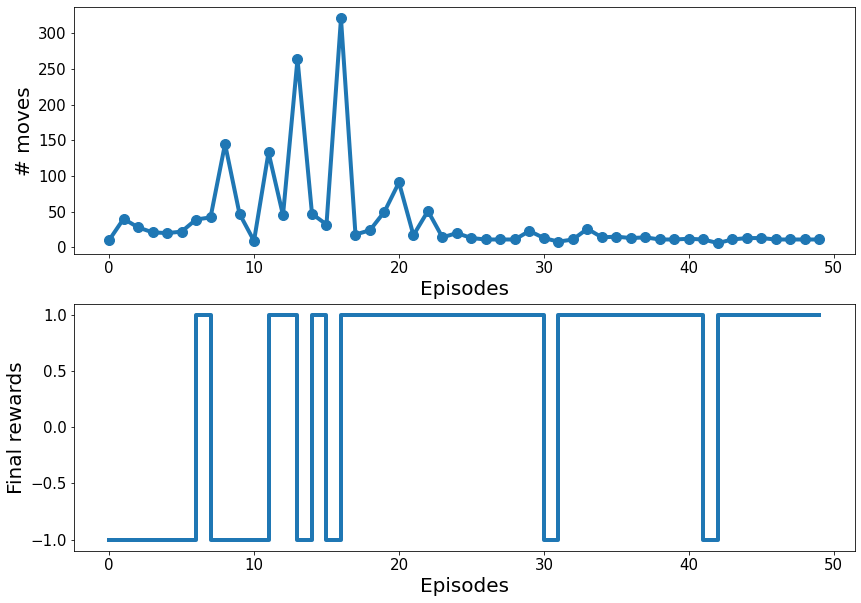

実行時間155.5382182598114sec


In [ ]:
# coding: utf-8

# Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

# ModuleNotFoundError: No module named 'gridworld_env'
from gridworld_env import GridWorldEnv
from agent import Agent
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

Transition = namedtuple(
    'Transition', ('state', 'action', 'reward', 'next_state', 'done'))


def run_qlearning(agent, env, num_episodes=50):
    history = []
    for episode in range(num_episodes):
        state = env.reset()
        env.render(mode='human')
        final_reward, n_moves = 0.0, 0
        while True:
            action = agent.choose_action(state)
            next_s, reward, done, _ = env.step(action)
            agent._learn(Transition(state, action, reward,
                                    next_s, done))
            env.render(mode='human', done=done)
            state = next_s
            n_moves += 1
            if done:
                break
            final_reward = reward
        history.append((n_moves, final_reward))
        print('Episode %d: Reward %.1f #Moves %d'
              % (episode, final_reward, n_moves))

    return history


def plot_learning_history(history):
    fig = plt.figure(1, figsize=(14, 10))
    ax = fig.add_subplot(2, 1, 1)
    episodes = np.arange(len(history))
    moves = np.array([h[0] for h in history])
    plt.plot(episodes, moves, lw=4,
             marker="o", markersize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('# moves', size=20)

    ax = fig.add_subplot(2, 1, 2)
    rewards = np.array([h[1] for h in history])
    plt.step(episodes, rewards, lw=4)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('Final rewards', size=20)
    plt.savefig('q-learning-history.png', dpi=300)
    plt.show()


if __name__ == '__main__':
    start = time.time()
    env = GridWorldEnv(num_rows=5, num_cols=6)
    agent = Agent(env)
    history = run_qlearning(agent, env)
    env.close()

    plot_learning_history(history)

    end = time.time()
    print(f'実行時間{end - start}sec')

実行時間150.74055218696594sec

50エピソードにわたってQ学習プログラムが実行される．

エージェントの挙動が可視化され，学習プロセスの最初のうちはエージェントがほとんどトラップ状態で終わっていることがわかる)Final rewardsが-1)．

しかし，失敗から学習するうちに，最終的にはゴールド状態を見つけ出している．

この図にプロットされている学習履歴は，エージェントが30個のエピソードの後にゴールド状態へのショートパスを学習したことを示している．

結果として，ϵ-𝑔𝑟𝑒𝑒𝑑𝑦ポリシーによるわずかなブレがあるものの，エピソード30以降のエピソードの長さがほぼ同じになっている．

___
### P601 深層Q学習アルゴリズムを実装する．


以下のコードではDQNAgentというクラスを定義する．このクラスは，DQNモデルを構築し，様々なパイパーパラメータを指定する．

以前の表形式のQ学習に基づくエージェントと比較すると，このクラスには追加のメソッドが2つもある．

(表形式の強化学習: 表の行番号がエージェントの状態に対応し，列番号がエージェントの行動に対応しているもの)


そのうちの一つであるrememberメソッドは，新しい遷移タプルをメモリバッファに追加する．

もう一つのreplayメソッドは遷移データからなるミニバッチを作成し，ネットワークの重みパラメータを更新するために，`_learn`メソッドに渡す．

In [ ]:
# coding: utf-8

# Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

import gym
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import deque

np.random.seed(1)
tf.random.set_seed(1)

Transition = namedtuple(
    'Transition', ('state', 'action', 'reward',
                   'next_state', 'done'))


class DQNAgent:
    def __init__(
            self, env, discount_factor=0.95,
            epsilon_greedy=1.0, epsilon_min=0.01,
            epsilon_decay=0.995, learning_rate=1e-3,
            max_memory_size=2000):
        self.env = env
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n

        self.memory = deque(maxlen=max_memory_size)

        self.gamma = discount_factor
        self.epsilon = epsilon_greedy
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.lr = learning_rate
        self._build_nn_model()

    def _build_nn_model(self, n_layers=3):
        self.model = tf.keras.Sequential()

        # 隠れ層
        for n in range(n_layers - 1):
            self.model.add(tf.keras.layers.Dense(
                units=32, activation='relu'))
            self.model.add(tf.keras.layers.Dense(
                units=32, activation='relu'))

        # 最後の層
        self.model.add(tf.keras.layers.Dense(
            units=self.action_size))

        # モデルの構築とコンパイル
        self.model.build(input_shape=(None, self.state_size))
        self.model.compile(
            loss='mse',
            optimizer=tf.keras.optimizers.Adam(lr=self.lr))

    def remember(self, transition):
        self.memory.append(transition)

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        q_values = self.model.predict(state)[0]
        return np.argmax(q_values)  # 行動を返す．

    def _learn(self, batch_samples):
        batch_states, batch_targets = [], []
        for transition in batch_samples:
            s, a, r, next_s, done = transition
            if done:
                target = r
            else:
                target = (r +
                          self.gamma * np.amax(
                            self.model.predict(next_s)[0]
                            )
                          )
            target_all = self.model.predict(s)[0]
            target_all[a] = target
            batch_states.append(s.flatten())
            batch_targets.append(target_all)
            self._adjust_epsilon()
        return self.model.fit(x=np.array(batch_states),
                              y=np.array(batch_targets),
                              epochs=1,
                              verbose=0)

    def _adjust_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def replay(self, batch_size):
        samples = random.sample(self.memory, batch_size)
        history = self._learn(samples)
        return history.history['loss'][0]



最後に，モデルを200エピソードにわたって訓練した後，`plot_learning_histry関数を使って学習履歴を可視化する．`

In [ ]:
# 実行時間5時間22で エピソード41 ここで中断してしまった．GPUに変更
# エピソード92で朝になって接続が切れた．(使用量上限に達したためGPUに接続できません．
# エピソード62で中断．7時間26分11 秒

# 学習履歴の可視化
def plot_learning_history(history):
    fig = plt.figure(1, figsize=(14, 5))
    ax = fig.add_subplot(1, 1, 1)
    episodes = np.arange(len(history[0])) + 1
    plt.plot(episodes, history[0], lw=4,
             marker='o', markersize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('# Total Rewards', size=20)
    plt.show()


# 全体的な設定
EPISODES = 200
batch_size = 32
init_replay_memory_size = 500

if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    agent = DQNAgent(env)
    state = env.reset()
    state = np.reshape(state, [1, agent.state_size])
    
    start = time.time()

    # リプレイメモリの設定
    for i in range(init_replay_memory_size):
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, agent.state_size])
        agent.remember(Transition(state, action, reward,
                                  next_state, done))
        if done:
            state = env.reset()
            state = np.reshape(state, [1, agent.state_size])
        else:
            state = next_state

    total_rewards, losses = [], []
    for e in range(EPISODES):
        state = env.reset()
        if e % 10 == 0:
            env.render()
        state = np.reshape(state, [1, agent.state_size])
        for i in range(500):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state,
                                    [1, agent.state_size])
            agent.remember(Transition(state, action, reward,
                                      next_state, done))
            state = next_state
            if e % 10 == 0:
                env.render()
            if done:
                total_rewards.append(i)
                print('Episode: %d/%d, Total reward: %d'
                      % (e, EPISODES, i))
                break
            loss = agent.replay(batch_size)
            losses.append(loss)
    plot_learning_history(total_rewards)

    
    end = time.time()
    print(f'実行時間{end - start}sec')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - ETA: 0s

![200episode](https://drive.google.com/uc?export=viwe&id=1TQc_Dl86EaeAFNwiE5RYX8Il_IQ5QqE2)

エピソードで得られる総報酬は，エージェントが棒のバランスを取ることができた時間の長さに等しい，この図にプロットされている学習履歴から，エピソードを30個ほど生成した後，棒のバランスを取り，200時刻以上にわたってその状態を保つ方法をエージェントが学習したことが分かる．

Episode: 62/200, Total reward: 142

Episode: 79/200, Total reward: 180

Episode: 67/200, Total reward: 188

Episode: 47/200, Total reward: 258

Episode: 38/200, Total reward: 102

Episode: 41/200, Total reward: 174

Episode: 48/200, Total reward: 155

Episode: 96/200, Total reward: 18

Episode: 71/200, Total reward: 138

Episode: 75/200, Total reward: 149

Episode: 80/200, Total reward: 175

Episode: 51/200, Total reward: 249

Episode: 68/200, Total reward: 239

Episode: 38/200, Total reward: 93

Episode: 73/200, Total reward: 161

Episode: 58/200, Total reward: 297

Episode: 75/200, Total reward: 211

Episode: 108/200, Total reward: 191

Episode: 73/200, Total reward: 233

Episode: 121/200, Total reward: 171

参考
* [強化学習の基本的な考え方](https://qiita.com/qiita_kuru/items/2c00a81b4b26bf9ad210)

* [強化学習 – 状態価値関数、行動価値関数について](https://pystyle.info/rl-reinforcement-learning/)

* [チョットワカル【一般化方策反復】](https://qiita.com/Sharkkii/items/92bbb957decc64ded0aa)